In [1]:
import pandas as pd

data = pd.read_csv('data.csv')
data.head()

,Location Latitude,Location Longitude,value
0,53.229648,-1.193654,54.0
1,53.000467,-1.144629,2.0
2,53.151023,-0.994262,4.0
3,52.970298,-1.155705,10.0
4,53.002265,-0.401439,41.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14590 entries, 0 to 14589
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location Latitude   14565 non-null  float64
 1   Location Longitude  14565 non-null  float64
 2   value               14590 non-null  float64
dtypes: float64(3)
memory usage: 342.1 KB


In [2]:
data.isna().sum()

Location Latitude     25
Location Longitude    25
value                  0
dtype: int64

In [3]:
data.dropna(inplace=True) # remove NaN values
data.drop(columns=['value'], inplace=True) # remove unnecessary `value` column
data.head()

,Location Latitude,Location Longitude
0,53.229648,-1.193654
1,53.000467,-1.144629
2,53.151023,-0.994262
3,52.970298,-1.155705
4,53.002265,-0.401439


In [5]:
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances

# Define the distance function
def vicenty_distance(point1, point2):
    lat1, lon1 = np.radians(point1)
    lat2, lon2 = np.radians(point2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))

    radius = 6371000  # Earth Radius in meters
    distance = radius * c
    return distance

In [6]:
# Calculate the pairwise distances using the Vicenty distance function
pairwise_matrix = pairwise_distances(data[['Location Latitude', 'Location Longitude']], metric=vicenty_distance)

In [7]:
pairwise_matrix

array([[     0.        ,  25692.95190686,  15902.9493624 , ...,
        204129.67627635, 203974.55160411, 192941.40084332],
       [ 25692.95190686,      0.        ,  19523.29582365, ...,
        179493.09014793, 178987.36756431, 168110.28452304],
       [ 15902.9493624 ,  19523.29582365,      0.        , ...,
        191146.28466946, 191477.68315959, 180235.55079005],
       ...,
       [204129.67627635, 179493.09014793, 191146.28466946, ...,
             0.        ,  10104.14806845,  12427.42749127],
       [203974.55160411, 178987.36756431, 191477.68315959, ...,
         10104.14806845,      0.        ,  11883.90189931],
       [192941.40084332, 168110.28452304, 180235.55079005, ...,
         12427.42749127,  11883.90189931,      0.        ]])

In [13]:
pairwise_matrix.shape

(14565, 14565)

In [11]:
# checking missing values in the matrix
missing_values = np.isnan(pairwise_matrix).sum()
missing_values

0

In [19]:
data = data[~np.isnan(pairwise_matrix).any(axis=1)]
pairwise_matrix = pairwise_matrix[~np.isnan(pairwise_matrix).any(axis=1)]

#### Finding The Right Numbers of Clusters (K)

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = [3,4,5,6,7,8]
inertias = []
silhouette_scores = []

for k_i in k:
    kmeans_i = KMeans(n_clusters=k_i, random_state=42)
    kmeans_i.fit(pairwise_matrix)
    inertias.append(kmeans_i.inertia_)
    silhouette_scores.append(silhouette_score(pairwise_matrix, kmeans_i.labels_))

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default valu

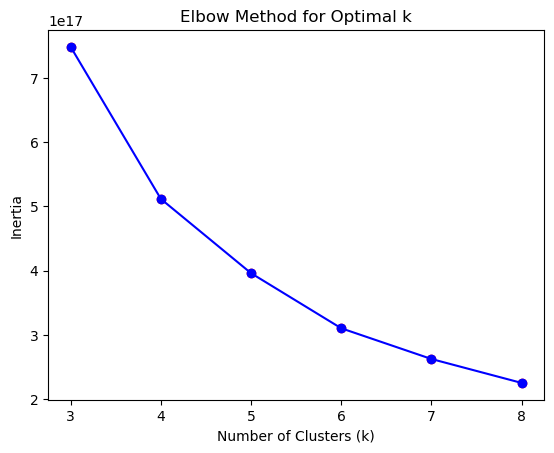

In [15]:
import matplotlib.pyplot as plt

plt.plot(k, inertias, marker='o', linestyle='-', color='b')
plt.scatter(k, inertias, color='r') 

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.show()

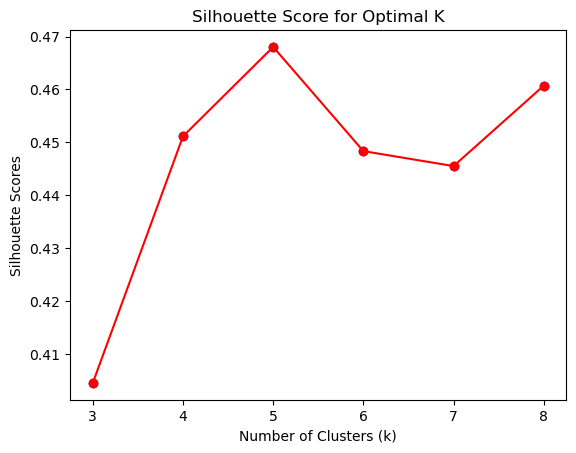

In [16]:
plt.plot(k, silhouette_scores, marker='o', linestyle='-', color='r') 
plt.scatter(k, silhouette_scores, color='b')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Score for Optimal K')

plt.show()

Both techniques suggest `k=5` is optimal number of cluster

In [22]:
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(pairwise_matrix)
data['Cluster'] = cluster_labels

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
data.head()

,Location Latitude,Location Longitude,Cluster
0,53.229648,-1.193654,0
1,53.000467,-1.144629,2
2,53.151023,-0.994262,2
3,52.970298,-1.155705,2
4,53.002265,-0.401439,2


In [25]:
# saving data with labels
data.to_csv("labeled_data.csv", index=False)